In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from droughts_modelling.data import train_last_2_years

pd.options.display.max_columns = 99

In [2]:
df = train_last_2_years()

In [3]:
df.shape

(2271948, 21)

In [25]:
df.head(20)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,week_num,weekday,month,year,score_day
5479,1001,2015-01-01,7.15,101.11,4.93,6.21,3.44,3.45,13.71,-0.49,14.20,6.30,1.34,2.27,0.27,2.00,2.70,4.85,0.39,4.46,NaN,1,4,January,2015,
5480,1001,2015-01-02,11.08,100.80,7.39,9.99,9.43,9.43,12.54,6.77,5.76,10.00,1.93,2.68,1.30,1.38,3.80,5.49,2.26,3.23,NaN,1,5,January,2015,
5481,1001,2015-01-03,24.03,100.26,11.56,16.54,15.95,15.95,21.33,11.17,10.16,16.50,3.65,4.50,2.50,2.01,6.78,8.29,4.95,3.34,NaN,1,6,January,2015,
5482,1001,2015-01-04,31.32,100.82,7.58,11.56,9.09,9.09,18.82,4.90,13.92,11.43,2.84,4.12,1.50,2.62,5.31,6.54,3.26,3.28,NaN,1,7,January,2015,
5483,1001,2015-01-05,0.00,101.75,3.26,3.19,-1.99,-1.93,9.06,-0.03,9.10,2.94,2.61,3.73,1.66,2.07,4.60,5.78,3.04,2.74,NaN,2,1,January,2015,
5484,1001,2015-01-06,0.00,101.26,3.79,3.75,-0.06,-0.04,11.48,-3.14,14.62,3.04,2.16,3.31,1.33,1.98,4.13,5.99,1.84,4.15,0.0000,2,2,January,2015,yes
5485,1001,2015-01-07,0.00,101.57,2.57,-0.04,-5.73,-5.53,6.62,-8.77,15.39,0.01,3.96,5.86,1.78,4.07,6.85,9.60,4.28,5.32,NaN,2,3,January,2015,
5486,1001,2015-01-08,0.00,101.80,1.40,-4.57,-12.42,-11.87,1.53,-9.35,10.87,-4.44,1.95,3.75,1.07,2.68,3.47,6.26,1.57,4.70,NaN,2,4,January,2015,
5487,1001,2015-01-09,0.00,101.38,2.42,-0.85,-5.81,-5.69,3.87,-3.98,7.85,-0.80,1.68,2.34,0.90,1.45,3.40,5.12,1.80,3.33,NaN,2,5,January,2015,
5488,1001,2015-01-10,0.00,101.67,2.34,0.02,-6.29,-6.13,7.31,-4.87,12.19,-0.31,1.96,2.70,0.69,2.01,3.69,6.35,0.92,5.43,NaN,2,6,January,2015,


* creating datetime object + extracting year, month, weeks
* loading first 10 rows of the df

In [60]:
# #maybe-too-complex weekly aggregating data function
# import pandas as pd
# import numpy as np
# import datetime as dt #needed to use datetime objects/functions

# #first create new features: year, month, weekday, weeknum
# df['week_num'] = pd.to_datetime(df['date']).dt.isocalendar().week
# df['weekday'] = pd.to_datetime(df['date']).dt.weekday+1
# df['month'] = pd.to_datetime(df['date']).dt.month_name()
# df['year'] = pd.to_datetime(df['date']).dt.isocalendar().year

# #then encode the score as a new feature - not sure if we'll need it
# df['score_day'] = df['score'].apply(lambda x: 'yes' if pd.notnull(x) == True else '')

# #then start aggregating by fips, year, month, week_num
# aggregated_df = df.groupby(['fips', 'year', 
#                                         'month', 'week_num']).agg(
#                                         {'PRECTOT': ['mean', 'std'],
#                                         'PS': ['mean', 'std'],
#                                         'QV2M': ['mean', 'std'],
#                                         'T2M': ['mean', 'std'],
#                                         'T2MDEW': ['mean', 'std'],
#                                         'T2MWET': ['mean', 'std'],
#                                         'T2M_MAX': ['mean', 'std'],
#                                         'T2M_MIN': ['mean', 'std'],
#                                         'T2M_RANGE': ['mean', 'std'],
#                                          'TS': ['mean', 'std'],
#                                          'WS10M': ['mean', 'std'],
#                                          'WS10M_MAX': ['mean', 'std'],
#                                          'WS10M_MIN': ['mean', 'std'],
#                                          'WS10M_RANGE': ['mean', 'std'],
#                                          'WS50M': ['mean', 'std'],
#                                          'WS50M_MAX': ['mean', 'std'],
#                                          'WS50M_MIN': ['mean', 'std'],
#                                          'WS50M_RANGE': ['mean', 'std'],
#                                          'score': 'max'}).reset_index()

# #finally, remove the multiindex from aggregated df to it looks neat and has flat column name structure
# aggregated_df.columns = ['_'.join(col) for col in aggregated_df.columns.values]


In [4]:
#maybe-too-complex weekly aggregating data function
import pandas as pd
import numpy as np
import datetime as dt #needed to use datetime objects/functions

#first create new features: year, month, weekday, weeknum
df['week_num'] = pd.to_datetime(df['date']).dt.isocalendar().week
df['weekday'] = pd.to_datetime(df['date']).dt.weekday+1
df['month'] = pd.to_datetime(df['date']).dt.month_name()
df['year'] = pd.to_datetime(df['date']).dt.isocalendar().year

#then encode the score as a new feature - not sure if we'll need it
df['score_day'] = df['score'].apply(lambda x: 'yes' if pd.notnull(x) == True else '')

#then start aggregating by fips, year, month, week_num
aggregated_df = df.groupby(['fips', 'year', 'week_num']).agg(
                                        {'PRECTOT': ['mean'],
                                        'PS': ['mean'],
                                        'QV2M': ['mean'],
                                        'T2M': ['mean'],
                                        'T2MDEW': ['mean'],
                                        'T2MWET': ['mean'],
                                        'T2M_MAX': ['mean'],
                                        'T2M_MIN': ['mean'],
                                        'T2M_RANGE': ['mean'],
                                         'TS': ['mean'],
                                         'WS10M': ['mean'],
                                         'WS10M_MAX': ['mean'],
                                         'WS10M_MIN': ['mean'],
                                         'WS10M_RANGE': ['mean'],
                                         'WS50M': ['mean'],
                                         'WS50M_MAX': ['mean'],
                                         'WS50M_MIN': ['mean'],
                                         'WS50M_RANGE': ['mean'],
                                         'score': 'max'}).reset_index()

#finally, remove the multiindex from aggregated df to it looks neat and has flat column name structure
aggregated_df.columns = ['_'.join(col) for col in aggregated_df.columns.values]

In [26]:
aggregated_df = aggregated_df.sort_values(['fips_', 'year_', 'week_num_'])

aggregated_df.head(20)

,fips_,year_,week_num_,PRECTOT_mean,PS_mean,QV2M_mean,T2M_mean,T2MDEW_mean,T2MWET_mean,T2M_MAX_mean,T2M_MIN_mean,T2M_RANGE_mean,TS_mean,WS10M_mean,WS10M_MAX_mean,WS10M_MIN_mean,WS10M_RANGE_mean,WS50M_mean,WS50M_MAX_mean,WS50M_MIN_mean,WS50M_RANGE_mean,score_max
1,1001,2015,2,0.002857,101.535714,2.877143,0.737143,-4.391429,-4.231429,6.757143,-4.450000,11.208571,0.581429,2.367143,3.472857,1.315714,2.157143,4.412857,6.474286,2.365714,4.111429,0.0000
2,1001,2015,3,0.411429,100.790000,5.025714,5.990000,3.551429,3.558571,12.050000,1.617143,10.432857,5.795714,1.947143,2.577143,1.231429,1.341429,3.590000,5.030000,2.134286,2.898571,0.0000
3,1001,2015,4,5.374286,100.198571,5.565714,7.737143,5.075714,5.080000,14.207143,2.825714,11.381429,7.631429,2.502857,3.632857,1.444286,2.187143,4.758571,6.832857,2.452857,4.381429,0.9979
4,1001,2015,5,1.834286,100.592857,4.972857,6.528571,3.097143,3.117143,13.137143,-0.035714,13.175714,6.472857,2.631429,3.901429,1.655714,2.242857,5.235714,7.395714,3.267143,4.127143,0.9979
5,1001,2015,6,0.804286,100.764286,4.147143,4.945714,0.377143,0.415714,12.190000,-2.222857,14.412857,4.544286,2.241429,3.210000,1.097143,2.111429,4.297143,6.324286,2.157143,4.164286,0.9979
6,1001,2015,7,0.241429,100.464286,4.371429,5.555714,0.734286,0.792857,12.477143,-1.471429,13.951429,5.635714,2.565714,3.730000,1.414286,2.317143,4.867143,6.884286,2.812857,4.072857,0.9979
7,1001,2015,8,8.225714,100.602857,4.275714,3.397143,-0.794286,-0.682857,9.668571,-1.941429,11.610000,3.470000,2.968571,4.302857,1.574286,2.728571,5.352857,7.601429,3.350000,4.254286,1.0000
8,1001,2015,9,6.394286,100.772857,4.412857,4.032857,1.512857,1.525714,9.822857,-0.540000,10.364286,4.144286,2.354286,3.288571,1.535714,1.751429,4.237143,5.655714,2.527143,3.130000,1.0000
9,1001,2015,10,2.077143,100.857143,6.957143,10.495714,6.322857,6.351429,18.778571,3.101429,15.674286,10.130000,2.268571,3.261429,1.255714,2.004286,4.164286,5.738571,2.370000,3.367143,0.9958
10,1001,2015,11,5.455714,100.524286,10.832857,17.022857,15.080000,15.080000,21.958571,13.121429,8.841429,16.940000,2.322857,3.212857,1.564286,1.650000,4.534286,6.197143,3.058571,3.140000,0.9958


In [32]:
aggregated_df.shape

(323232, 22)

In [7]:
# origin_1001 = df[(df['fips']==1001) & (df['month']=='January') & (df['year']==2015) & (df['week_num']<4)]
# origin_1001

### Feature Exploration

#### WS10M

* Wind Speed at 10 Meters (m/s) for the specific FIPS (Federal Information Processing Standard state code)

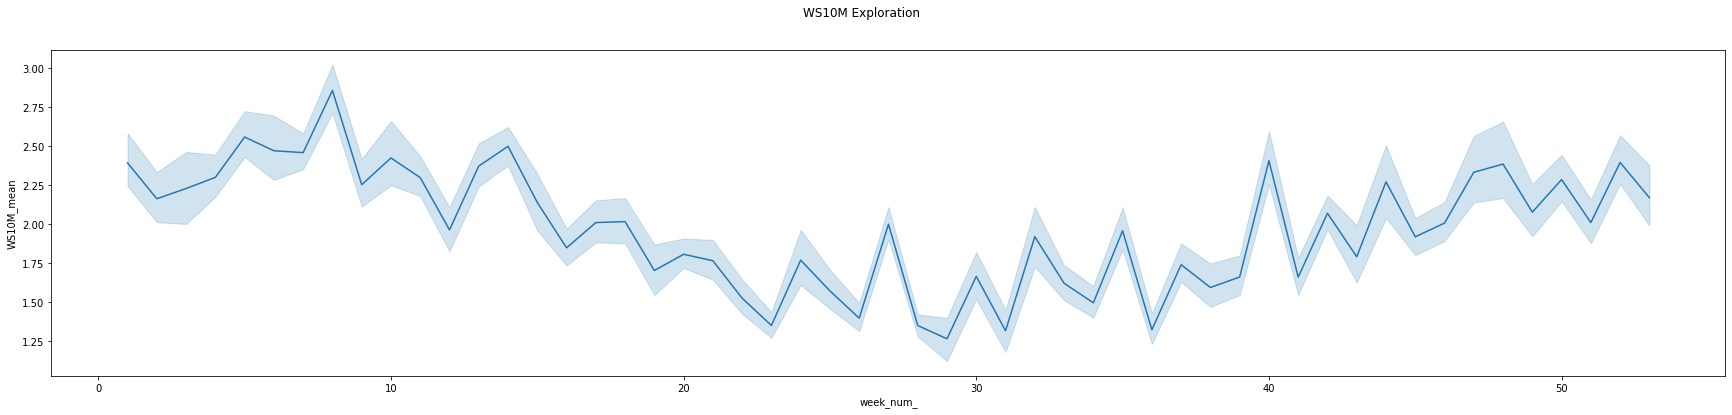

In [8]:
fig = plt.figure(figsize=(30,6))
fig.suptitle('WS10M Exploration')
sns.lineplot(data=aggregated_df[:1000], x='week_num_', y='WS10M_mean');

### Feature Correlation

#### High-level Correlation

<AxesSubplot:>

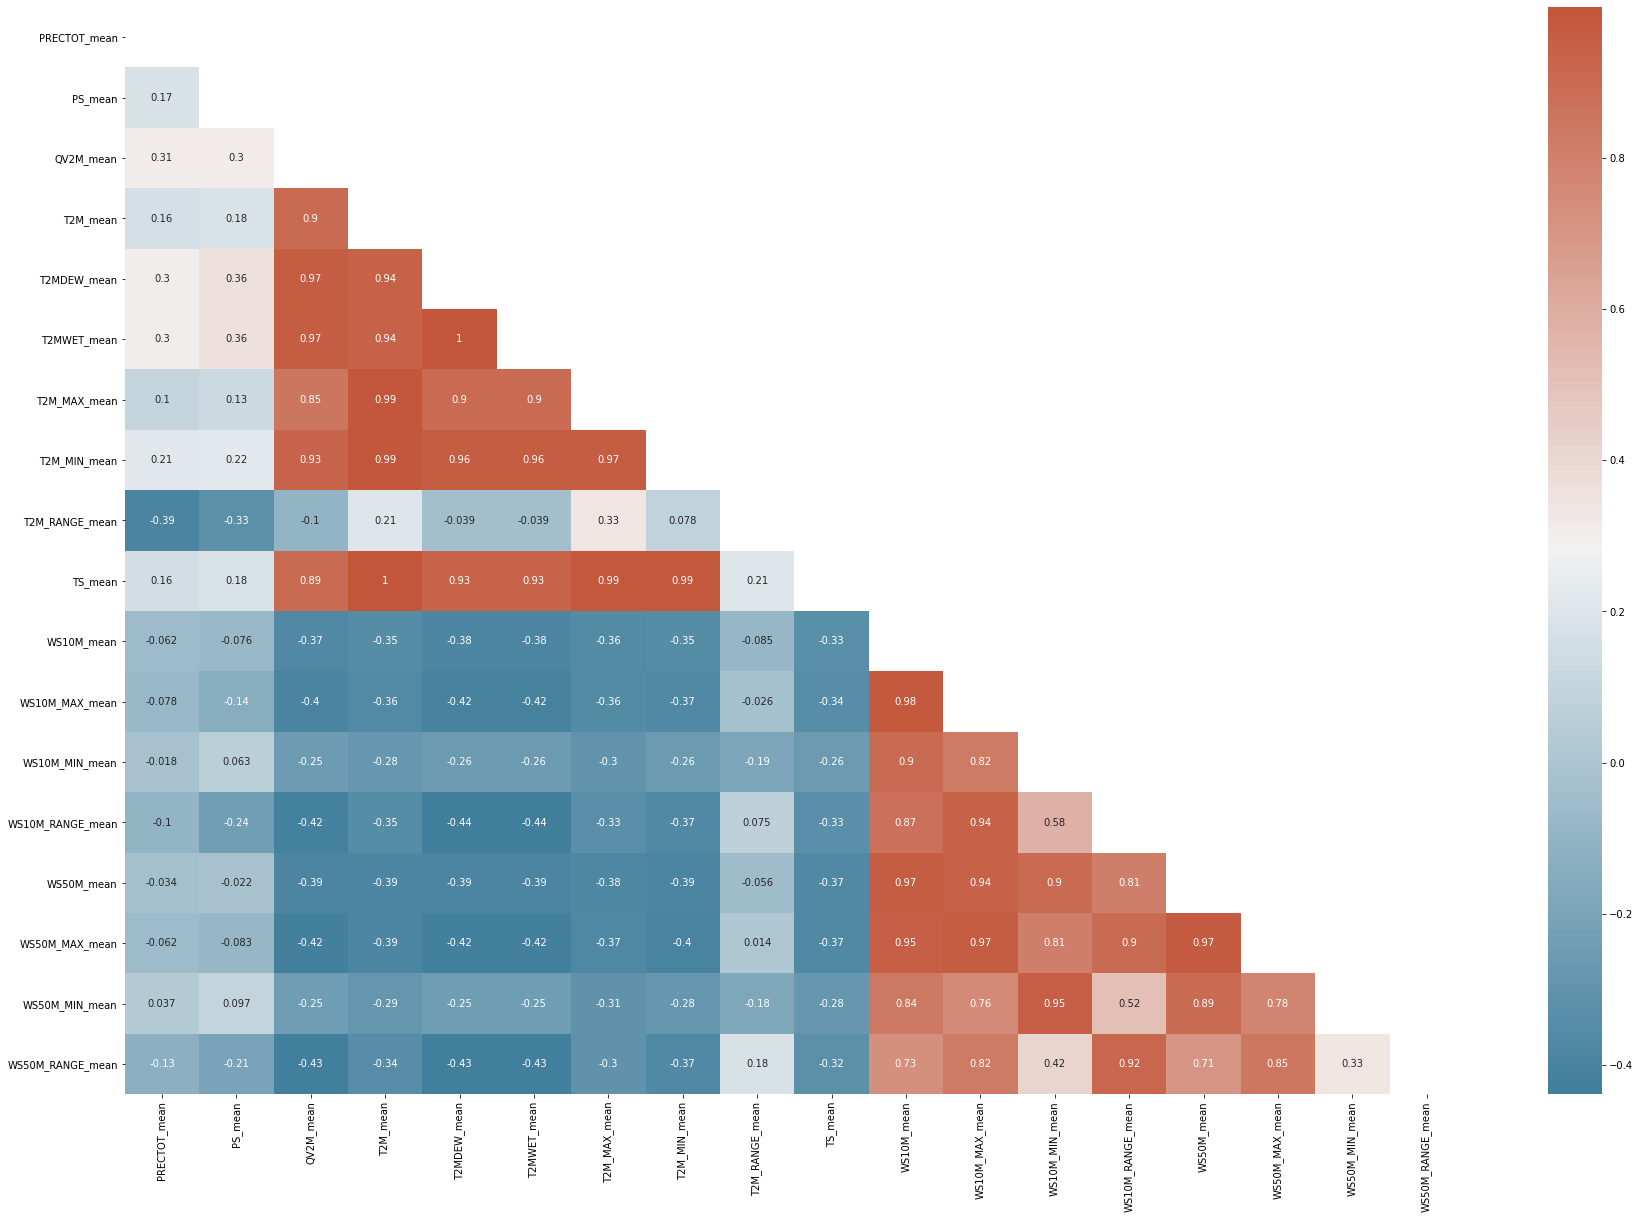

In [9]:
corr = aggregated_df.drop(columns=['fips_','year_', 'week_num_', 'score_max']).corr(method='pearson')
f, ax = plt.subplots(figsize=(30, 20))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

#### Feature Selection - k Best

In [10]:
aggregated_df = aggregated_df.dropna()
y = round(aggregated_df['score_max'])
X = aggregated_df.drop(columns=['fips_', 'year_', 'week_num_', 'score_max'])


In [11]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

k_best_f = SelectKBest(f_classif, k=10).fit(X, y)

df_scores = pd.DataFrame({'features': X.columns, 'ANOVA F-value': k_best_f.scores_, 'pValue': k_best_f.pvalues_ })


In [12]:
len(k_best_f.scores_)

18

In [15]:
df_scores.sort_values('ANOVA F-value', ascending=False).reset_index()

,index,features,ANOVA F-value,pValue
0,8,T2M_RANGE_mean,2483.046123,0.000000e+00
1,16,WS50M_MIN_mean,2312.596987,0.000000e+00
2,1,PS_mean,2064.885860,0.000000e+00
3,14,WS50M_mean,1938.070784,0.000000e+00
4,12,WS10M_MIN_mean,1771.624621,0.000000e+00
5,15,WS50M_MAX_mean,1446.510469,0.000000e+00
6,10,WS10M_mean,1118.657265,0.000000e+00
7,2,QV2M_mean,944.388236,0.000000e+00
8,11,WS10M_MAX_mean,674.493994,0.000000e+00
9,4,T2MDEW_mean,673.228811,0.000000e+00


#### Feature Selection - DecisionTree

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=6, random_state=2)
tree_clf.fit(X,round(y))

DecisionTreeClassifier(max_depth=6, random_state=2)

In [19]:
tree_clf.feature_importances_

array([0.03820911, 0.23989422, 0.03851578, 0.        , 0.09771021,
       0.01673157, 0.05589984, 0.01205878, 0.25450566, 0.02945177,
       0.02797938, 0.00471475, 0.00179104, 0.01623244, 0.00343855,
       0.14668239, 0.        , 0.01618451])

In [20]:
pd.DataFrame({'features': X.columns, 'Feature Importance': tree_clf.feature_importances_})\
.sort_values('Feature Importance', ascending=False).iloc[:20]

,features,Feature Importance
8,T2M_RANGE_mean,0.254506
1,PS_mean,0.239894
15,WS50M_MAX_mean,0.146682
4,T2MDEW_mean,0.097710
6,T2M_MAX_mean,0.055900
2,QV2M_mean,0.038516
0,PRECTOT_mean,0.038209
9,TS_mean,0.029452
10,WS10M_mean,0.027979
5,T2MWET_mean,0.016732


#### Feature Selection - Extra Tree Classifier

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

In [22]:
extra_tree.fit(X, y)

ExtraTreesClassifier()

In [23]:
feat_importances = pd.DataFrame({'features': X.columns, 'Feature Importance': tree_clf.feature_importances_})\
.sort_values('Feature Importance', ascending=False).iloc[:20]
feat_importances

,features,Feature Importance
8,T2M_RANGE_mean,0.254506
1,PS_mean,0.239894
15,WS50M_MAX_mean,0.146682
4,T2MDEW_mean,0.097710
6,T2M_MAX_mean,0.055900
2,QV2M_mean,0.038516
0,PRECTOT_mean,0.038209
9,TS_mean,0.029452
10,WS10M_mean,0.027979
5,T2MWET_mean,0.016732


### Feature Engineering

#### Lorem

In [28]:
'WEEK | FIP CODE | D_NONE PROBABILITY | D0 PROBABILITY | D1 PROBABILITY | D2 PROBABILITY | D3 PROBABILITY | D4 PROBABILITY | CERTAINTY | VOLATILITY (over previous 10 years for specific week)'

'WEEK | FIP CODE | D_NONE PROBABILITY | D0 PROBABILITY | D1 PROBABILITY | D2 PROBABILITY | D3 PROBABILITY | D4 PROBABILITY | CERTAINTY | VOLATILITY (over previous 10 years for specific week)'

In [31]:
sorted(round(aggregated_df['score_max']).unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]